# Draw Focus for paper


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS

- creation date : May 12th 2020
- update : May 15th 2020 : add R350


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools
import matplotlib.gridspec as gridspec

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 13),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.size': 14}
plt.rcParams.update(params)

## Constants for conversions

In [3]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [4]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [5]:
deg_to_rad=np.pi/180.

In [6]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [7]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### filter

In [8]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### CCD detector

In [9]:
Det_xpic=24.0 # microns per pixel
#Det_NbPix=2048 # number of pixels per CCD side
Det_NbPix=2512 # number of pixels per CCD side For 400 only
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

## Input file

In [10]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [11]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

In [12]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [13]:
if theta_x_num>0:
    theta_nstr='{:0>2}'.format(theta_x_num)
    theta_x_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_x_num)
    theta_x_str="m"+theta_nstr

In [14]:
if theta_y_num>0:
    theta_nstr='{:0>2}'.format(theta_y_num)
    theta_y_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_y_num)
    theta_y_str="m"+theta_nstr

In [15]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_allwl_{}_{}".format(NBTOT,theta_x_str,theta_y_str)

In [16]:
Beam4_Rayfile

'Beam4_Rayfile_484_allwl_m00_m00'

## Wavelength

In [17]:
ColorDict = {0.0004:"b",0.0006:"g",0.0008:"r",0.001:"k"}

# Read input files

In [18]:
#rayfile_hoe=Beam4_Rayfile+"_RAY_HOE_OUT.xlsx"
#rayfile_R400=Beam4_Rayfile+"_RAY_RON400_OUT.xlsx"
#rayfile_R350=Beam4_Rayfile+"_RAY_RON350_OUT.xlsx"
#rayfile_R200=Beam4_Rayfile+"_RAY_RON200_OUT.xlsx"

In [19]:
rayfile_hoe="HOE_Beam4_Rayfile_484_allwl_m00_m00_2020_05_25_B4OUT_RAY.xlsx"
rayfile_R200="R200_Beam4_Rayfile_484_allwl_m00_m00_2020_05_25_B4OUT_RAY.xlsx"
rayfile_R350="R350_Beam4_Rayfile_484_allwl_m00_m00_2020_05_25_B4OUT_RAY.xlsx"
rayfile_R400="R400_Beam4_Rayfile_484_allwl_m00_m00_2020_05_25_B4OUT_RAY.xlsx"

In [20]:
input_hoe = pd.ExcelFile(rayfile_hoe)
df_hoe = input_hoe.parse(index_row=0,header=1)
df_hoe=df_hoe.iloc[0:NBTOT]

In [21]:
# rename columns otherwise they are not recognize and swap X,Y
#df_hoe.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]
#df_hoe.columns = ["Y0","X0","Z0","V0","U0","W0","wave","Y1","X1","Z1","Y2","X2","Z2","Y3","X3","Z3","Yfinal","Xfinal","Zfinal","Notes"]

In [22]:
df_hoe

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,-2.856536,-2.856536,0,0.035661,0.035661,0.998727,0.0004,b,-2.106694,-2.10669,...,8.27790,-0.01283,79.99998,0,0,8.27790,-0.01283,80,OK,3
1,-2.285228,-2.856536,0,0.028535,0.035669,0.998956,0.0004,b,-1.685357,-2.10670,...,8.28523,-0.01285,79.99998,0,0,8.28523,-0.01285,80,OK,3
2,-1.713921,-2.856536,0,0.021406,0.035676,0.999134,0.0004,b,-1.264016,-2.10669,...,8.29260,-0.01287,79.99998,0,0,8.29260,-0.01287,80,OK,3
3,-1.142614,-2.856536,0,0.014272,0.035680,0.999261,0.0004,b,-0.842679,-2.10670,...,8.30001,-0.01289,79.99998,0,0,8.30001,-0.01289,80,OK,3
4,-0.571307,-2.856536,0,0.007137,0.035683,0.999338,0.0004,b,-0.421339,-2.10670,...,8.30745,-0.01291,79.99998,0,0,8.30745,-0.01291,80,OK,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.571307,2.856536,0,-0.007137,-0.035683,0.999338,0.0010,k,0.421339,2.10670,...,21.97558,-0.05372,79.99998,0,0,21.97558,-0.05372,80,OK,3
480,1.142614,2.856536,0,-0.014272,-0.035680,0.999261,0.0010,k,0.842679,2.10670,...,21.94330,-0.05361,79.99998,0,0,21.94330,-0.05361,80,OK,3
481,1.713921,2.856536,0,-0.021406,-0.035676,0.999134,0.0010,k,1.264016,2.10669,...,21.91098,-0.05350,79.99998,0,0,21.91098,-0.05350,80,OK,3
482,2.285228,2.856536,0,-0.028535,-0.035669,0.998956,0.0010,k,1.685357,2.10670,...,21.87866,-0.05338,79.99998,0,0,21.87866,-0.05338,80,OK,3


In [23]:
input_R400 = pd.ExcelFile(rayfile_R400)
df_R400 = input_R400.parse(index_row=0,header=1)
df_R400=df_R400.iloc[0:NBTOT]

In [24]:
# rename columns otherwise they are not recognize
#df_R400.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]

In [25]:
df_R400

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,-2.856536,-2.856536,0,0.035661,0.035661,0.998727,0.0004,b,-2.106694,-2.10669,...,9.50870,0.03953,80,0,0,9.50870,0.03953,80,OK,3
1,-2.285228,-2.856536,0,0.028535,0.035669,0.998956,0.0004,b,-1.685357,-2.10670,...,9.48531,0.03701,80,0,0,9.48531,0.03701,80,OK,3
2,-1.713921,-2.856536,0,0.021406,0.035676,0.999134,0.0004,b,-1.264016,-2.10669,...,9.46349,0.03451,80,0,0,9.46349,0.03451,80,OK,3
3,-1.142614,-2.856536,0,0.014272,0.035680,0.999261,0.0004,b,-0.842678,-2.10670,...,9.44321,0.03201,80,0,0,9.44321,0.03201,80,OK,3
4,-0.571307,-2.856536,0,0.007137,0.035683,0.999338,0.0004,b,-0.421339,-2.10670,...,9.42447,0.02953,80,0,0,9.42447,0.02953,80,OK,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.571307,2.856536,0,-0.007137,-0.035683,0.999338,0.0010,k,0.421339,2.10670,...,25.21121,-0.18127,80,0,0,25.21121,-0.18127,80,OK,3
480,1.142614,2.856536,0,-0.014272,-0.035680,0.999261,0.0010,k,0.842678,2.10670,...,25.09532,-0.17373,80,0,0,25.09532,-0.17373,80,OK,3
481,1.713921,2.856536,0,-0.021406,-0.035676,0.999134,0.0010,k,1.264016,2.10669,...,24.98470,-0.16628,80,0,0,24.98470,-0.16628,80,OK,3
482,2.285228,2.856536,0,-0.028535,-0.035669,0.998956,0.0010,k,1.685357,2.10670,...,24.87929,-0.15892,80,0,0,24.87929,-0.15892,80,OK,3


In [26]:
input_R200 = pd.ExcelFile(rayfile_R200)
df_R200 = input_R200.parse(index_row=0,header=1)
df_R200=df_R200.iloc[0:NBTOT]

In [27]:
# rename columns otherwise they are not recognize
#df_R200.columns = ["X0","Y0","Z0","U0","V0","W0","wave","X1","Y1","Z1","X2","Y2","Z2","X3","Y3","Z3","Xfinal","Yfinal","Zfinal","Notes"]

In [28]:
df_R200

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,-2.856536,-2.856536,0,0.035661,0.035661,0.998727,0.0004,b,-2.106694,-2.10669,...,4.68705,0.01269,80,0,0,4.68705,0.01269,80,OK,3
1,-2.285228,-2.856536,0,0.028535,0.035669,0.998956,0.0004,b,-1.685357,-2.10670,...,4.67976,0.01147,80,0,0,4.67976,0.01147,80,OK,3
2,-1.713921,-2.856536,0,0.021406,0.035676,0.999134,0.0004,b,-1.264016,-2.10669,...,4.67321,0.01027,80,0,0,4.67321,0.01027,80,OK,3
3,-1.142614,-2.856536,0,0.014272,0.035680,0.999261,0.0004,b,-0.842678,-2.10670,...,4.66738,0.00906,80,0,0,4.66738,0.00906,80,OK,3
4,-0.571307,-2.856536,0,0.007137,0.035683,0.999338,0.0004,b,-0.421339,-2.10670,...,4.66228,0.00786,80,0,0,4.66228,0.00786,80,OK,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.571307,2.856536,0,-0.007137,-0.035683,0.999338,0.0010,k,0.421339,2.10670,...,11.82185,-0.03962,80,0,0,11.82185,-0.03962,80,OK,3
480,1.142614,2.856536,0,-0.014272,-0.035680,0.999261,0.0010,k,0.842678,2.10670,...,11.79859,-0.03650,80,0,0,11.79859,-0.03650,80,OK,3
481,1.713921,2.856536,0,-0.021406,-0.035676,0.999134,0.0010,k,1.264016,2.10669,...,11.77726,-0.03340,80,0,0,11.77726,-0.03340,80,OK,3
482,2.285228,2.856536,0,-0.028535,-0.035669,0.998956,0.0010,k,1.685357,2.10670,...,11.75785,-0.03031,80,0,0,11.75785,-0.03031,80,OK,3


In [29]:
input_R350 = pd.ExcelFile(rayfile_R350)
df_R350 = input_R350.parse(index_row=0,header=1)
df_R350=df_R350.iloc[0:NBTOT]

In [30]:
df_R350

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23
0,-2.856536,-2.856536,0,0.035661,0.035661,0.998727,0.0004,b,-2.106694,-2.10669,...,8.28509,0.03142,80.0,0,0.0,8.28509,0.03142,80,OK,3.0
1,-2.285228,-2.856536,0,0.028535,0.035669,0.998956,0.0004,b,-1.685357,-2.10670,...,8.26662,0.02923,80.0,0,0.0,8.26662,0.02923,80,OK,3.0
2,-1.713921,-2.856536,0,0.021406,0.035676,0.999134,0.0004,b,-1.264016,-2.10669,...,8.24951,0.02707,80.0,0,0.0,8.24951,0.02707,80,OK,3.0
3,-1.142614,-2.856536,0,0.014272,0.035680,0.999261,0.0004,b,-0.842678,-2.10670,...,8.23371,0.02491,80.0,0,0.0,8.23371,0.02491,80,OK,3.0
4,-0.571307,-2.856536,0,0.007137,0.035683,0.999338,0.0004,b,-0.421339,-2.10670,...,8.21925,0.02276,80.0,0,0.0,8.21925,0.02276,80,OK,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.571307,2.856536,0,-0.007137,-0.035683,0.999338,0.0010,k,0.421339,2.10670,...,21.59873,-0.13376,80.0,0,0.0,21.59873,-0.13376,80,OK,3.0
480,1.142614,2.856536,0,-0.014272,-0.035680,0.999261,0.0010,k,0.842678,2.10670,...,21.51529,-0.12756,80.0,0,0.0,21.51529,-0.12756,80,OK,3.0
481,1.713921,2.856536,0,-0.021406,-0.035676,0.999134,0.0010,k,1.264016,2.10669,...,21.43600,-0.12143,80.0,0,0.0,21.43600,-0.12143,80,OK,3.0
482,2.285228,2.856536,0,-0.028535,-0.035669,0.998956,0.0010,k,1.685357,2.10670,...,21.36083,-0.11535,80.0,0,0.0,21.36083,-0.11535,80,OK,3.0


# Compute straight line parameters for each ray

In [31]:
def norm(x,y,z):
    return np.sqrt(x**2+y**2+z**2)

In [32]:
def norm_row(row):
    DX=row["X3"]-row["X2"]
    DY=row["Y3"]-row["Y2"]
    DZ=row["Z3"]-row["Z2"]
    return norm(DX,DY,DZ)

In [33]:
def u_row(row):
    norm=norm_row(row)
    DX=row["X3"]-row["X2"]
    return DX/norm

In [34]:
def v_row(row):
    norm=norm_row(row)
    DY=row["Y3"]-row["Y2"]
    return DY/norm

In [35]:
def w_row(row):
    norm=norm_row(row)
    DZ=row["Z3"]-row["Z2"]
    return DZ/norm

In [36]:
def norm_check(row):
    return norm(row["Uf"],row["Vf"],row["Wf"])

In [37]:
df_hoe["Uf"]=df_hoe.apply(u_row,axis=1)
df_hoe["Vf"]=df_hoe.apply(v_row,axis=1)
df_hoe["Wf"]=df_hoe.apply(w_row,axis=1)

In [38]:
#df_hoe.apply(norm_check,axis=1)

In [39]:
df_R400["Uf"]=df_R400.apply(u_row,axis=1)
df_R400["Vf"]=df_R400.apply(v_row,axis=1)
df_R400["Wf"]=df_R400.apply(w_row,axis=1)

In [40]:
#df_R400.apply(norm_check,axis=1)

In [41]:
df_R200["Uf"]=df_R200.apply(u_row,axis=1)
df_R200["Vf"]=df_R200.apply(v_row,axis=1)
df_R200["Wf"]=df_R200.apply(w_row,axis=1)

In [42]:
#df_R200.apply(norm_check,axis=1)

In [43]:
df_R350["Uf"]=df_R350.apply(u_row,axis=1)
df_R350["Vf"]=df_R350.apply(v_row,axis=1)
df_R350["Wf"]=df_R350.apply(w_row,axis=1)

# Compute the intersection points (Xi,Yi) with the plane Z=Zi

In [44]:
def xi_row(row):
    k=(row["Zi"]-row["Z3"])/row["Wf"]
    xi=row["X3"]+ k*row["Uf"]
    return xi

In [45]:
def yi_row(row):
    k=(row["Zi"]-row["Z3"])/row["Wf"]
    yi=row["Y3"]+ k*row["Vf"]
    return yi

In [46]:
df_hoe["Zi"]=df_hoe["Z3"]+1 

In [47]:
df_hoe["Xi"]=df_hoe.apply(xi_row,axis=1)
df_hoe["Yi"]=df_hoe.apply(yi_row,axis=1)

In [48]:
df_hoe

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,Yfinal,Zfinal,Notes,Unnamed: 23,Uf,Vf,Wf,Zi,Xi,Yi
0,-2.856536,-2.856536,0,0.035661,0.035661,0.998727,0.0004,b,-2.106694,-2.10669,...,-0.01283,80,OK,3,0.175548,0.034912,0.983852,80.99998,8.456329,0.022656
1,-2.285228,-2.856536,0,0.028535,0.035669,0.998956,0.0004,b,-1.685357,-2.10670,...,-0.01285,80,OK,3,0.168847,0.034954,0.985022,80.99998,8.456644,0.022635
2,-1.713921,-2.856536,0,0.021406,0.035676,0.999134,0.0004,b,-1.264016,-2.10669,...,-0.01287,80,OK,3,0.162123,0.034993,0.986150,80.99998,8.457000,0.022615
3,-1.142614,-2.856536,0,0.014272,0.035680,0.999261,0.0004,b,-0.842679,-2.10670,...,-0.01289,80,OK,3,0.155377,0.035031,0.987234,80.99998,8.457396,0.022594
4,-0.571307,-2.856536,0,0.007137,0.035683,0.999338,0.0004,b,-0.421339,-2.10670,...,-0.01291,80,OK,3,0.148610,0.035068,0.988274,80.99998,8.457823,0.022574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.571307,2.856536,0,-0.007137,-0.035683,0.999338,0.0010,k,0.421339,2.10670,...,-0.05372,80,OK,3,0.348244,-0.034317,0.936775,80.99998,22.347328,-0.090353
480,1.142614,2.856536,0,-0.014272,-0.035680,0.999261,0.0010,k,0.842679,2.10670,...,-0.05361,80,OK,3,0.341884,-0.034401,0.939112,80.99998,22.307350,-0.090241
481,1.713921,2.856536,0,-0.021406,-0.035676,0.999134,0.0010,k,1.264016,2.10669,...,-0.05350,80,OK,3,0.335476,-0.034483,0.941418,80.99998,22.267332,-0.090129
482,2.285228,2.856536,0,-0.028535,-0.035669,0.998956,0.0010,k,1.685357,2.10670,...,-0.05338,80,OK,3,0.329020,-0.034565,0.943690,80.99998,22.227313,-0.090007


In [49]:
df_hoe.groupby(["wave"]).mean()

,X0,Y0,Z0,U0,V0,W0,X1,Y1,Z1,X2,...,Xfinal,Yfinal,Zfinal,Unnamed: 23,Uf,Vf,Wf,Zi,Xi,Yi
wave,,,,,,,,,,,,,,,,,,,,,
0.0004,7.340318e-18,6.606286e-17,0,4.587698e-19,4.587698e-19,0.999491,-1.835079e-17,-3.670159e-18,21,0.0,...,8.315042,7.741741e-19,80,3,0.141777,-3.956890e-18,0.989411,80.99998,8.458405,2.293849e-19
0.0006,7.340318e-18,6.606286e-17,0,4.587698e-19,4.587698e-19,0.999491,-1.835079e-17,-3.670159e-18,21,0.0,...,12.635655,2.867312e-20,80,3,0.212665,2.408542e-18,0.976642,80.99998,12.853511,3.440774e-19
0.0008,7.340318e-18,6.606286e-17,0,4.587698e-19,4.587698e-19,0.999491,-1.835079e-17,-3.670159e-18,21,0.0,...,17.167122,-5.161161e-19,80,3,0.283553,-4.014236e-19,0.958471,80.99998,17.463107,3.440774e-19
0.0010,7.340318e-18,6.606286e-17,0,4.587698e-19,4.587698e-19,0.999491,-1.835079e-17,-3.670159e-18,21,0.0,...,22.007870,-1.318963e-18,80,3,0.354442,-1.835079e-18,0.934586,80.99998,22.387316,-3.899544e-18


In [50]:
df_hoe.groupby(["wave"]).std()

,X0,Y0,Z0,U0,V0,W0,X1,Y1,Z1,X2,...,Xfinal,Yfinal,Zfinal,Unnamed: 23,Uf,Vf,Wf,Zi,Xi,Yi
wave,,,,,,,,,,,,,,,,,,,,,
0.0004,1.814144,1.814144,0.0,0.022661,0.022661,0.000319,1.337931,1.337933,0.0,1.315254,...,0.023806,0.008203,0.0,0.0,0.021584,0.022293,0.003104,0.0,0.001547,0.014332
0.0006,1.814144,1.814144,0.0,0.022661,0.022661,0.000319,1.337931,1.337933,0.0,1.315254,...,0.005994,0.002056,0.0,0.0,0.021046,0.022109,0.004587,0.0,0.016580,0.020585
0.0008,1.814144,1.814144,0.0,0.022661,0.022661,0.000319,1.337931,1.337933,0.0,1.315254,...,0.034419,0.011689,0.0,0.0,0.020507,0.021925,0.006067,0.0,0.057689,0.034567
0.0010,1.814144,1.814144,0.0,0.022661,0.022661,0.000319,1.337931,1.337933,0.0,1.315254,...,0.102292,0.034169,0.0,0.0,0.019969,0.021741,0.007569,0.0,0.126732,0.057435


In [51]:
df_hoe.groupby(["wave"]).std()["Xi"]

wave
0.0004    0.001547
0.0006    0.016580
0.0008    0.057689
0.0010    0.126732
Name: Xi, dtype: float64

In [52]:
df_hoe.groupby(["wave"]).std().iloc[0]

X0             1.814144
Y0             1.814144
Z0             0.000000
U0             0.022661
V0             0.022661
W0             0.000319
X1             1.337931
Y1             1.337933
Z1             0.000000
X2             1.315254
Y2             1.315254
Z2             0.000000
X3             0.023806
Y3             0.008203
Z3             0.000000
Xgoal          0.000000
Ygoal          0.000000
Xfinal         0.023806
Yfinal         0.008203
Zfinal         0.000000
Unnamed: 23    0.000000
Uf             0.021584
Vf             0.022293
Wf             0.003104
Zi             0.000000
Xi             0.001547
Yi             0.014332
Name: 0.0004, dtype: float64

# Loop on focal plane focus shift

- blue line : 400 nm
- green line : 600 nm
- red line : 800 nm
- black line : 1000 nm

In [53]:
all_Zfocus=np.arange(-15,5,0.2)  # from -10 mm to 5 mm step 200 microns, thus 75 points

In [54]:
Nfocus=len(all_Zfocus)

In [55]:
Nfocus

100

## loop on defocus for HOE

In [56]:
all_Xi_av_hoe=np.zeros((Nfocus,NWL))
all_Xi_std_hoe=np.zeros((Nfocus,NWL))
all_Yi_av_hoe=np.zeros((Nfocus,NWL))
all_Yi_std_hoe=np.zeros((Nfocus,NWL))

In [57]:
# loop on defocus
for ifocus,defocus in np.ndenumerate(all_Zfocus):
    idx=ifocus[0]
    df_hoe["Zi"]=df_hoe["Z3"]+defocus 
    # compute intersection points with the new detection plane
    df_hoe["Xi"]=df_hoe.apply(xi_row,axis=1)
    df_hoe["Yi"]=df_hoe.apply(yi_row,axis=1)
    
    # group by wavelength
    df_av=df_hoe.groupby(["wave"]).mean()
    df_std=df_hoe.groupby(["wave"]).std()
    
    # loop on wavelength
    for iwl in np.arange(NWL):
        all_Xi_av_hoe[idx,iwl]=df_av.iloc[iwl]["Xi"]
        all_Yi_av_hoe[idx,iwl]=df_av.iloc[iwl]["Yi"]
        all_Xi_std_hoe[idx,iwl]=df_std.iloc[iwl]["Xi"]
        all_Yi_std_hoe[idx,iwl]=df_std.iloc[iwl]["Yi"]

Text(0.5, 1.0, 'spot size versus defocus for HOE')

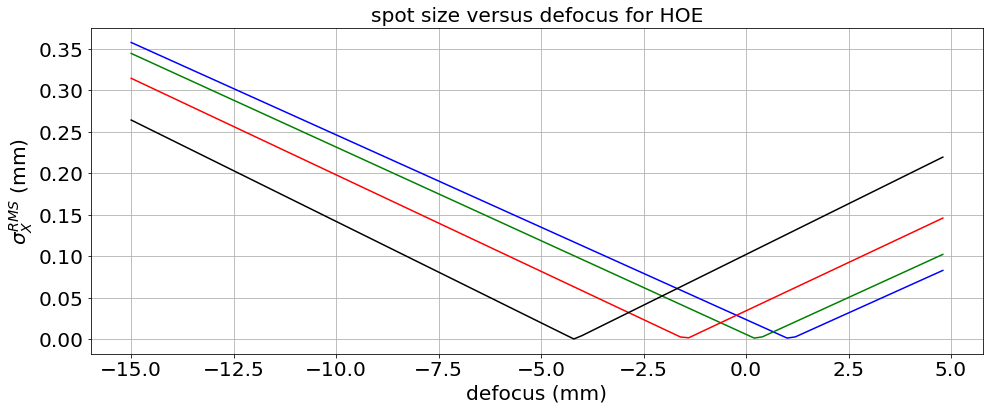

In [58]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Xi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{X}^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE")

In [59]:
idx=np.where(all_Xi_std_hoe[:,3]==all_Xi_std_hoe[:,3].min())[0][0]

In [60]:
all_Zfocus[idx]

-4.200000000000038

In [61]:
for iwl in np.arange(0,4):
    idx=np.where(all_Xi_std_hoe[:,iwl]==all_Xi_std_hoe[:,iwl].min())[0][0]
    shift=all_Zfocus[idx]
    print("HOE : iwl={}, defocus={:3.3f} mm ".format(iwl,shift))

HOE : iwl=0, defocus=1.000 mm 
HOE : iwl=1, defocus=0.200 mm 
HOE : iwl=2, defocus=-1.400 mm 
HOE : iwl=3, defocus=-4.200 mm 


Text(0.5, 1.0, 'spot size versus defocus for HOE')

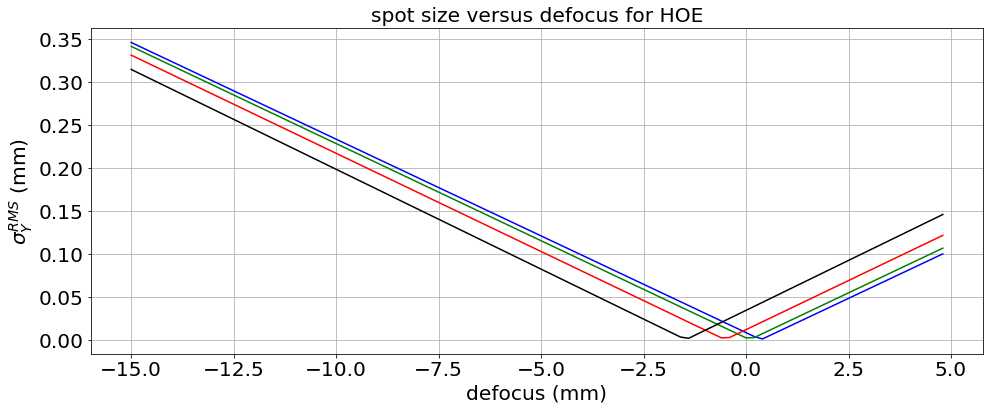

In [62]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Yi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{Y}^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE")

In [63]:
all_XiYi_std_hoe=np.sqrt(all_Xi_std_hoe**2+all_Yi_std_hoe**2)

Text(0.5, 1.0, 'spot size versus defocus for HOE')

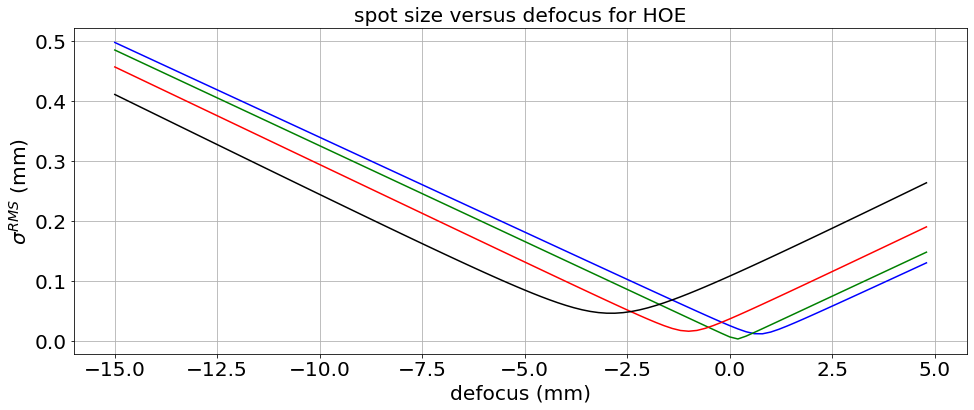

In [64]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE")

## loop on defocus for Ron 400

In [65]:
df_R400

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23,Uf,Vf,Wf
0,-2.856536,-2.856536,0,0.035661,0.035661,0.998727,0.0004,b,-2.106694,-2.10669,...,0,0,9.50870,0.03953,80,OK,3,0.195661,0.035661,0.980023
1,-2.285228,-2.856536,0,0.028535,0.035669,0.998956,0.0004,b,-1.685357,-2.10670,...,0,0,9.48531,0.03701,80,OK,3,0.188536,0.035669,0.981418
2,-1.713921,-2.856536,0,0.021406,0.035676,0.999134,0.0004,b,-1.264016,-2.10669,...,0,0,9.46349,0.03451,80,OK,3,0.181405,0.035676,0.982761
3,-1.142614,-2.856536,0,0.014272,0.035680,0.999261,0.0004,b,-0.842678,-2.10670,...,0,0,9.44321,0.03201,80,OK,3,0.174272,0.035680,0.984051
4,-0.571307,-2.856536,0,0.007137,0.035683,0.999338,0.0004,b,-0.421339,-2.10670,...,0,0,9.42447,0.02953,80,OK,3,0.167137,0.035683,0.985288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.571307,2.856536,0,-0.007137,-0.035683,0.999338,0.0010,k,0.421339,2.10670,...,0,0,25.21121,-0.18127,80,OK,3,0.392863,-0.035683,0.918904
480,1.142614,2.856536,0,-0.014272,-0.035680,0.999261,0.0010,k,0.842678,2.10670,...,0,0,25.09532,-0.17373,80,OK,3,0.385728,-0.035680,0.921922
481,1.713921,2.856536,0,-0.021406,-0.035676,0.999134,0.0010,k,1.264016,2.10669,...,0,0,24.98470,-0.16628,80,OK,3,0.378594,-0.035676,0.924875
482,2.285228,2.856536,0,-0.028535,-0.035669,0.998956,0.0010,k,1.685357,2.10670,...,0,0,24.87929,-0.15892,80,OK,3,0.371465,-0.035669,0.927762


In [66]:
all_Xi_av_R400=np.zeros((Nfocus,NWL))
all_Xi_std_R400=np.zeros((Nfocus,NWL))
all_Yi_av_R400=np.zeros((Nfocus,NWL))
all_Yi_std_R400=np.zeros((Nfocus,NWL))

In [67]:
# loop on defocus
for ifocus,defocus in np.ndenumerate(all_Zfocus):
    idx=ifocus[0]
    df_R400["Zi"]=df_R400["Z3"]+defocus 
    # compute intersection points with the new detection plane
    df_R400["Xi"]=df_R400.apply(xi_row,axis=1)
    df_R400["Yi"]=df_R400.apply(yi_row,axis=1)
    
    # group by wavelength
    df_av=df_R400.groupby(["wave"]).mean()
    df_std=df_R400.groupby(["wave"]).std()
    
    # loop on wavelength
    for iwl in np.arange(NWL):
        all_Xi_av_R400[idx,iwl]=df_av.iloc[iwl]["Xi"]
        all_Yi_av_R400[idx,iwl]=df_av.iloc[iwl]["Yi"]
        all_Xi_std_R400[idx,iwl]=df_std.iloc[iwl]["Xi"]
        all_Yi_std_R400[idx,iwl]=df_std.iloc[iwl]["Yi"]

Text(0.5, 1.0, 'spot size versus defocus for R400')

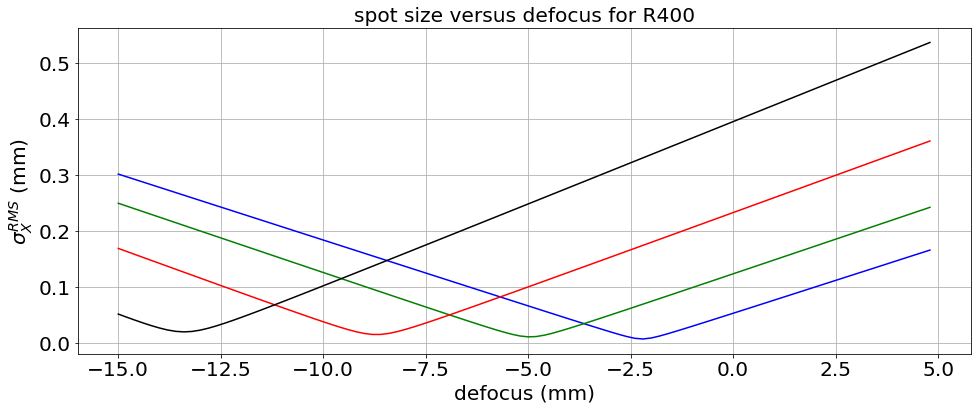

In [68]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Xi_std_R400[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_R400[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_R400[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_R400[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{X}^{RMS}$ (mm)")
plt.title("spot size versus defocus for R400")

In [69]:
for iwl in np.arange(0,4):
    idx=np.where(all_Xi_std_R400[:,iwl]==all_Xi_std_R400[:,iwl].min())[0][0]
    shift=all_Zfocus[idx]
    print("R400 : iwl={}, defocus={:3.3f} mm ".format(iwl,shift))

R400 : iwl=0, defocus=-2.200 mm 
R400 : iwl=1, defocus=-5.000 mm 
R400 : iwl=2, defocus=-8.800 mm 
R400 : iwl=3, defocus=-13.400 mm 


Text(0.5, 1.0, 'spot size versus defocus for R400')

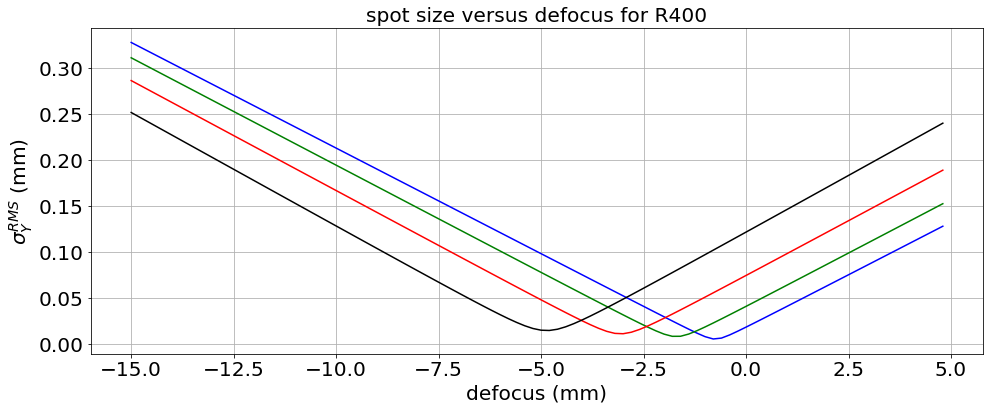

In [70]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Yi_std_R400[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_R400[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_R400[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_R400[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{Y}^{RMS}$ (mm)")
plt.title("spot size versus defocus for R400")

In [71]:
all_XiYi_std_R400=np.sqrt(all_Xi_std_R400**2+all_Yi_std_R400**2)

Text(0.5, 1.0, 'spot size versus defocus for R400')

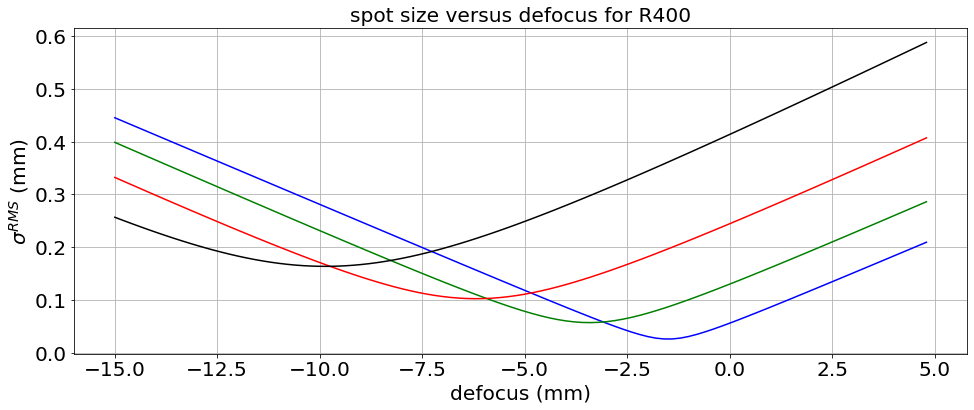

In [72]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_R400[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for R400")

Text(0.5, 1.0, 'spot size versus defocus for HOE and R400')

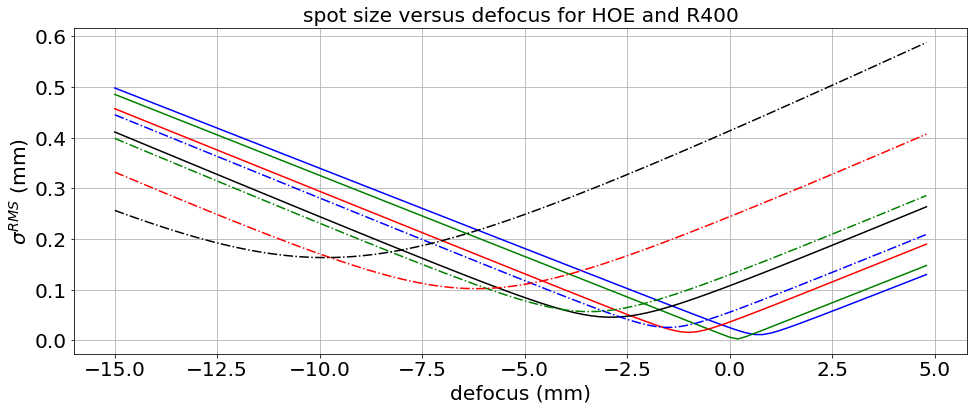

In [73]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,3],"k-")

plt.plot(all_Zfocus,all_XiYi_std_R400[:,0],"b-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,1],"g-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,2],"r-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,3],"k-.")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE and R400")

## loop on defocus for Ron 350

In [74]:
all_Xi_av_R350=np.zeros((Nfocus,NWL))
all_Xi_std_R350=np.zeros((Nfocus,NWL))
all_Yi_av_R350=np.zeros((Nfocus,NWL))
all_Yi_std_R350=np.zeros((Nfocus,NWL))

In [75]:
# loop on defocus
for ifocus,defocus in np.ndenumerate(all_Zfocus):
    idx=ifocus[0]
    df_R350["Zi"]=df_R350["Z3"]+defocus 
    # compute intersection points with the new detection plane
    df_R350["Xi"]=df_R350.apply(xi_row,axis=1)
    df_R350["Yi"]=df_R350.apply(yi_row,axis=1)
    
    # group by wavelength
    df_av=df_R350.groupby(["wave"]).mean()
    df_std=df_R350.groupby(["wave"]).std()
    
    # loop on wavelength
    for iwl in np.arange(NWL):
        all_Xi_av_R350[idx,iwl]=df_av.iloc[iwl]["Xi"]
        all_Yi_av_R350[idx,iwl]=df_av.iloc[iwl]["Yi"]
        all_Xi_std_R350[idx,iwl]=df_std.iloc[iwl]["Xi"]
        all_Yi_std_R350[idx,iwl]=df_std.iloc[iwl]["Yi"]

In [76]:
for iwl in np.arange(0,4):
    idx=np.where(all_Xi_std_R350[:,iwl]==all_Xi_std_R350[:,iwl].min())[0][0]
    shift=all_Zfocus[idx]
    print("R350 : iwl={}, defocus={:3.3f} mm ".format(iwl,shift))

R350 : iwl=0, defocus=-1.800 mm 
R350 : iwl=1, defocus=-3.800 mm 
R350 : iwl=2, defocus=-15.000 mm 
R350 : iwl=3, defocus=-15.000 mm 


## loop on defocus for Ron 200

In [77]:
df_R200

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal,Notes,Unnamed: 23,Uf,Vf,Wf
0,-2.856536,-2.856536,0,0.035661,0.035661,0.998727,0.0004,b,-2.106694,-2.10669,...,0,0,4.68705,0.01269,80,OK,3,0.115661,0.035661,0.992648
1,-2.285228,-2.856536,0,0.028535,0.035669,0.998956,0.0004,b,-1.685357,-2.10670,...,0,0,4.67976,0.01147,80,OK,3,0.108536,0.035669,0.993452
2,-1.713921,-2.856536,0,0.021406,0.035676,0.999134,0.0004,b,-1.264016,-2.10669,...,0,0,4.67321,0.01027,80,OK,3,0.101406,0.035676,0.994205
3,-1.142614,-2.856536,0,0.014272,0.035680,0.999261,0.0004,b,-0.842678,-2.10670,...,0,0,4.66738,0.00906,80,OK,3,0.094272,0.035680,0.994907
4,-0.571307,-2.856536,0,0.007137,0.035683,0.999338,0.0004,b,-0.421339,-2.10670,...,0,0,4.66228,0.00786,80,OK,3,0.087137,0.035683,0.995557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.571307,2.856536,0,-0.007137,-0.035683,0.999338,0.0010,k,0.421339,2.10670,...,0,0,11.82185,-0.03962,80,OK,3,0.192863,-0.035683,0.980577
480,1.142614,2.856536,0,-0.014272,-0.035680,0.999261,0.0010,k,0.842678,2.10670,...,0,0,11.79859,-0.03650,80,OK,3,0.185728,-0.035680,0.981953
481,1.713921,2.856536,0,-0.021406,-0.035676,0.999134,0.0010,k,1.264016,2.10669,...,0,0,11.77726,-0.03340,80,OK,3,0.178595,-0.035676,0.983276
482,2.285228,2.856536,0,-0.028535,-0.035669,0.998956,0.0010,k,1.685357,2.10670,...,0,0,11.75785,-0.03031,80,OK,3,0.171465,-0.035669,0.984544


In [78]:
all_Xi_av_R200=np.zeros((Nfocus,NWL))
all_Xi_std_R200=np.zeros((Nfocus,NWL))
all_Yi_av_R200=np.zeros((Nfocus,NWL))
all_Yi_std_R200=np.zeros((Nfocus,NWL))

In [79]:
# loop on defocus
for ifocus,defocus in np.ndenumerate(all_Zfocus):
    idx=ifocus[0]
    df_R200["Zi"]=df_R200["Z3"]+defocus 
    # compute intersection points with the new detection plane
    df_R200["Xi"]=df_R200.apply(xi_row,axis=1)
    df_R200["Yi"]=df_R200.apply(yi_row,axis=1)
    
    # group by wavelength
    df_av=df_R200.groupby(["wave"]).mean()
    df_std=df_R200.groupby(["wave"]).std()
    
    # loop on wavelength
    for iwl in np.arange(NWL):
        all_Xi_av_R200[idx,iwl]=df_av.iloc[iwl]["Xi"]
        all_Yi_av_R200[idx,iwl]=df_av.iloc[iwl]["Yi"]
        all_Xi_std_R200[idx,iwl]=df_std.iloc[iwl]["Xi"]
        all_Yi_std_R200[idx,iwl]=df_std.iloc[iwl]["Yi"]

Text(0.5, 1.0, 'spot size versus defocus for R200')

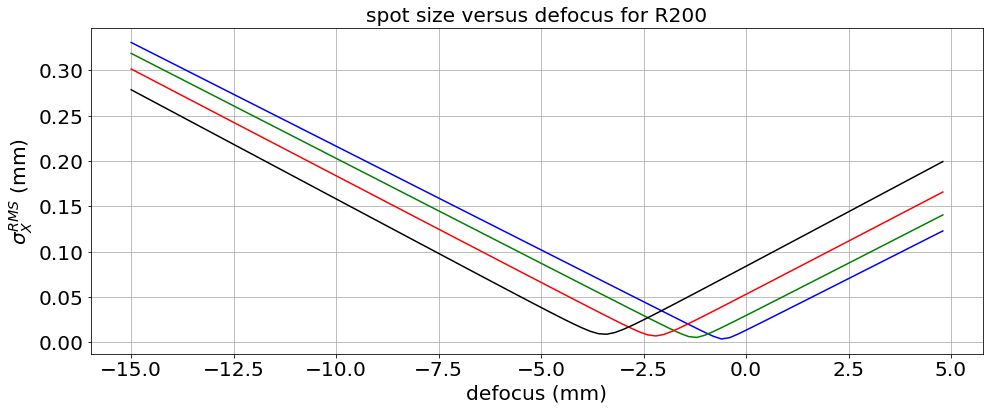

In [80]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Xi_std_R200[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_R200[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_R200[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_R200[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{X}^{RMS}$ (mm)")
plt.title("spot size versus defocus for R200")

In [81]:
iwl=3
idx=np.where(all_Xi_std_R200[:,iwl]==all_Xi_std_R200[:,iwl].min())[0][0]
all_Zfocus[idx]

-3.400000000000041

In [82]:
for iwl in np.arange(0,4):
    idx=np.where(all_Xi_std_R200[:,iwl]==all_Xi_std_R200[:,iwl].min())[0][0]
    shift=all_Zfocus[idx]
    print("R200 : iwl={}, defocus={:3.3f} mm ".format(iwl,shift))

R200 : iwl=0, defocus=-0.600 mm 
R200 : iwl=1, defocus=-1.200 mm 
R200 : iwl=2, defocus=-2.200 mm 
R200 : iwl=3, defocus=-3.400 mm 


Text(0.5, 1.0, 'spot size versus defocus for R200')

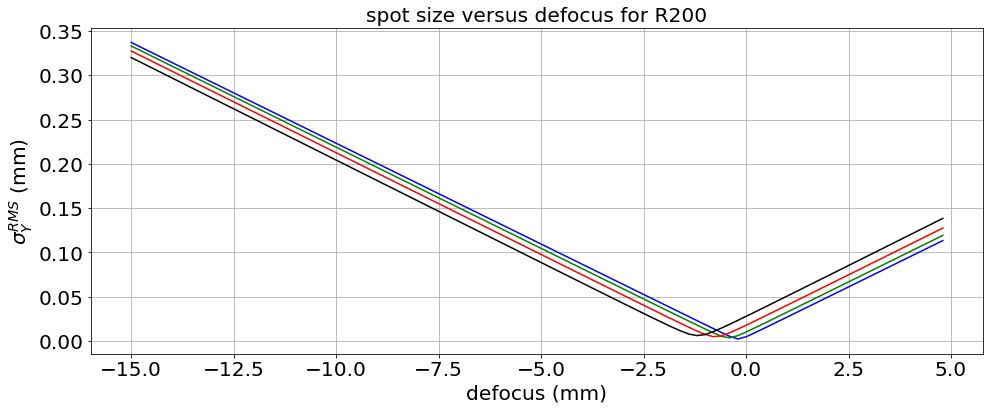

In [83]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Yi_std_R200[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_R200[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_R200[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_R200[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{Y}^{RMS}$ (mm)")
plt.title("spot size versus defocus for R200")

In [84]:
all_XiYi_std_R200=np.sqrt(all_Xi_std_R200**2+all_Yi_std_R200**2)

Text(0.5, 1.0, 'spot size versus defocus for R200')

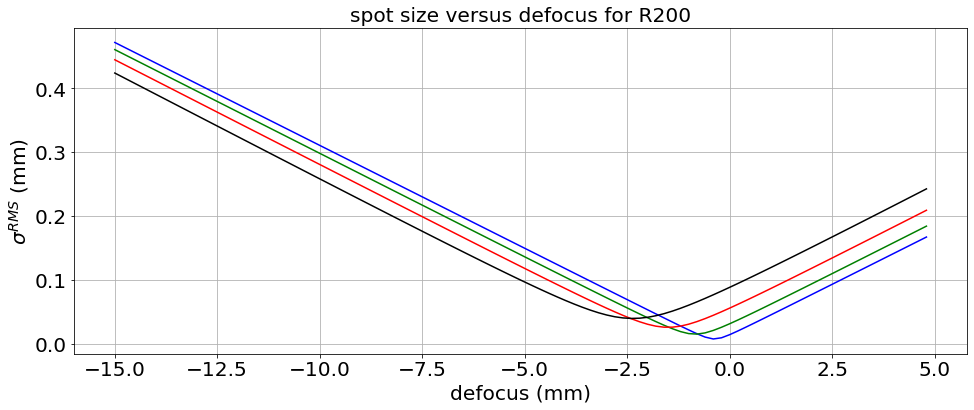

In [85]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_R200[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,3],"k-")
plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for R200")

## Combination HOE, R400 and R200

- solid line : HOE
- dotted line : R400

Text(0.5, 1.0, 'spot size versus defocus for HOE, , R400 and R200')

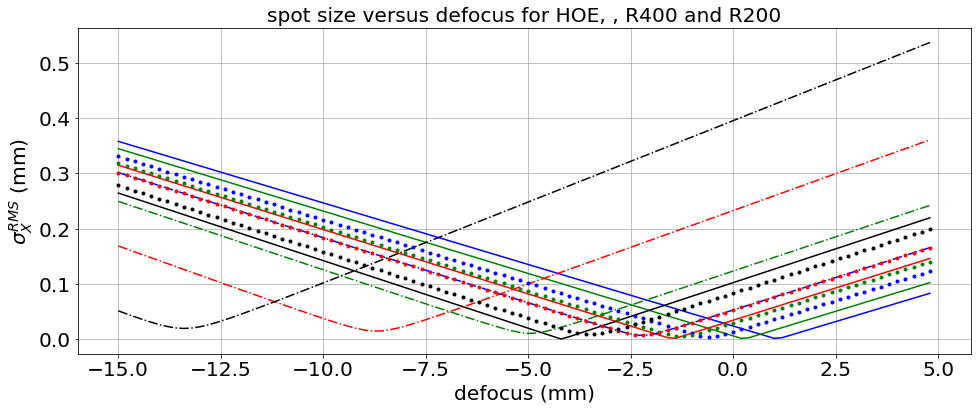

In [86]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Xi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,3],"k-")

plt.plot(all_Zfocus,all_Xi_std_R400[:,0],"b-.")
plt.plot(all_Zfocus,all_Xi_std_R400[:,1],"g-.")
plt.plot(all_Zfocus,all_Xi_std_R400[:,2],"r-.")
plt.plot(all_Zfocus,all_Xi_std_R400[:,3],"k-.")

plt.plot(all_Zfocus,all_Xi_std_R200[:,0],"b.")
plt.plot(all_Zfocus,all_Xi_std_R200[:,1],"g.")
plt.plot(all_Zfocus,all_Xi_std_R200[:,2],"r.")
plt.plot(all_Zfocus,all_Xi_std_R200[:,3],"k.")



plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{X}^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE, , R400 and R200")

Text(0.5, 1.0, 'spot size versus defocus for HOE, , R400 and R200')

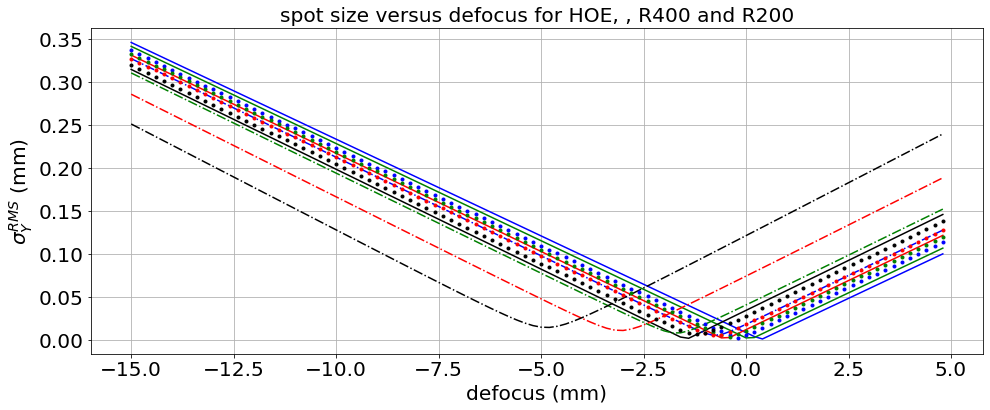

In [87]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_Yi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,3],"k-")

plt.plot(all_Zfocus,all_Yi_std_R400[:,0],"b-.")
plt.plot(all_Zfocus,all_Yi_std_R400[:,1],"g-.")
plt.plot(all_Zfocus,all_Yi_std_R400[:,2],"r-.")
plt.plot(all_Zfocus,all_Yi_std_R400[:,3],"k-.")

plt.plot(all_Zfocus,all_Yi_std_R200[:,0],"b.")
plt.plot(all_Zfocus,all_Yi_std_R200[:,1],"g.")
plt.plot(all_Zfocus,all_Yi_std_R200[:,2],"r.")
plt.plot(all_Zfocus,all_Yi_std_R200[:,3],"k.")


plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{Y}^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE, , R400 and R200")

Text(0.5, 1.0, 'spot size versus defocus for HOE, R400 and R200')

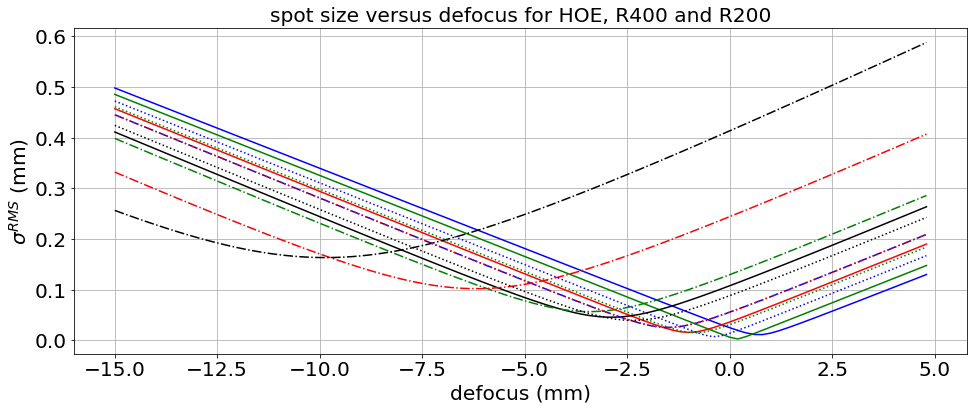

In [88]:
plt.figure(figsize=(16,6))
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,3],"k-")

plt.plot(all_Zfocus,all_XiYi_std_R400[:,0],"b-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,1],"g-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,2],"r-.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,3],"k-.")

plt.plot(all_Zfocus,all_XiYi_std_R200[:,0],"b:")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,1],"g:")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,2],"r:")
plt.plot(all_Zfocus,all_XiYi_std_R200[:,3],"k:")

plt.grid()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("spot size versus defocus for HOE, R400 and R200")

# Image for paper

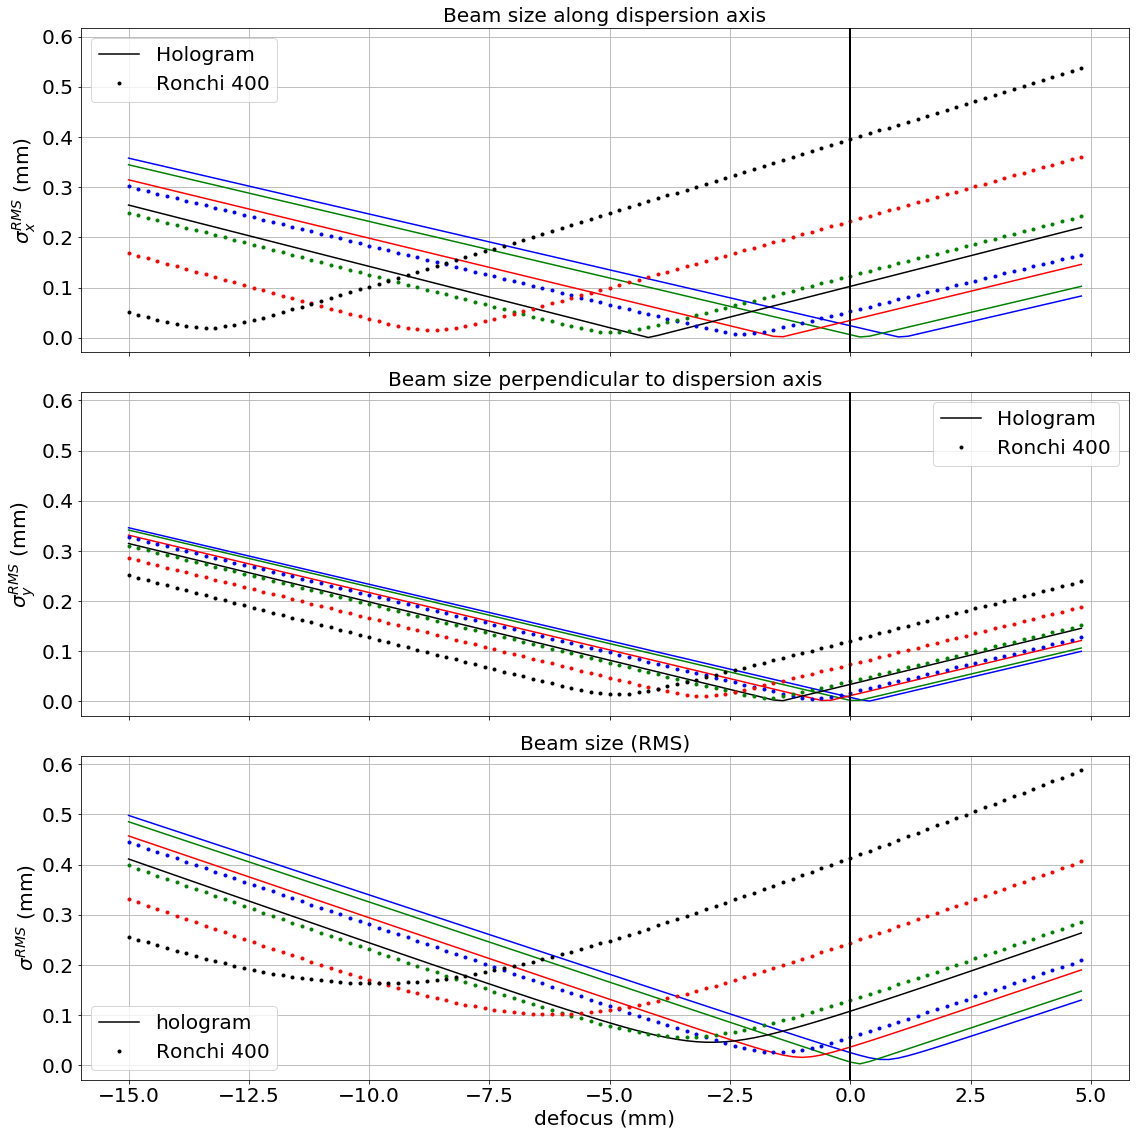

In [89]:
plt.figure(figsize=(16,16))


ax1 = plt.subplot(311)
plt.plot(all_Zfocus,all_Xi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Xi_std_hoe[:,3],"k-",label="Hologram")

plt.plot(all_Zfocus,all_Xi_std_R400[:,0],"b.")
plt.plot(all_Zfocus,all_Xi_std_R400[:,1],"g.")
plt.plot(all_Zfocus,all_Xi_std_R400[:,2],"r.")
plt.plot(all_Zfocus,all_Xi_std_R400[:,3],"k.",label="Ronchi 400")

#plt.plot(all_Zfocus,all_Xi_std_R200[:,0],"b.")
#plt.plot(all_Zfocus,all_Xi_std_R200[:,1],"g.")
#plt.plot(all_Zfocus,all_Xi_std_R200[:,2],"r.")
#plt.plot(all_Zfocus,all_Xi_std_R200[:,3],"k.")

plt.axvline(x=0,lw=2,c="k")

plt.grid()
plt.legend()
#plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{x}^{RMS}$ (mm)")
plt.title("Beam size along dispersion axis")

plt.setp(ax1.get_xticklabels(), visible=False)
#plt.setp(ax1.get_xticklabels(), fontsize=6)


ax2 = plt.subplot(312, sharex=ax1,sharey=ax1)
plt.plot(all_Zfocus,all_Yi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_Yi_std_hoe[:,3],"k-",label="Hologram")

plt.plot(all_Zfocus,all_Yi_std_R400[:,0],"b.")
plt.plot(all_Zfocus,all_Yi_std_R400[:,1],"g.")
plt.plot(all_Zfocus,all_Yi_std_R400[:,2],"r.")
plt.plot(all_Zfocus,all_Yi_std_R400[:,3],"k.",label="Ronchi 400")

#plt.plot(all_Zfocus,all_Yi_std_R200[:,0],"b.")
#plt.plot(all_Zfocus,all_Yi_std_R200[:,1],"g.")
#plt.plot(all_Zfocus,all_Yi_std_R200[:,2],"r.")
#plt.plot(all_Zfocus,all_Yi_std_R200[:,3],"k.")

plt.axvline(x=0,lw=2,c="k")

plt.grid()
plt.legend()
#plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma_{y}^{RMS}$ (mm)")
plt.title("Beam size perpendicular to dispersion axis")

# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,0],"b-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,1],"g-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,2],"r-")
plt.plot(all_Zfocus,all_XiYi_std_hoe[:,3],"k-",label="hologram")

plt.plot(all_Zfocus,all_XiYi_std_R400[:,0],"b.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,1],"g.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,2],"r.")
plt.plot(all_Zfocus,all_XiYi_std_R400[:,3],"k.",label="Ronchi 400")

#plt.plot(all_Zfocus,all_XiYi_std_R200[:,0],"b:")
#plt.plot(all_Zfocus,all_XiYi_std_R200[:,1],"g:")
#plt.plot(all_Zfocus,all_XiYi_std_R200[:,2],"r:")
#plt.plot(all_Zfocus,all_XiYi_std_R200[:,3],"k:")

plt.axvline(x=0,lw=2,c="k")

plt.grid()
plt.legend()
plt.xlabel("defocus (mm)")
plt.ylabel("$\sigma^{RMS}$ (mm)")
plt.title("Beam size (RMS)")

plt.tight_layout()
plt.savefig("defocus_v2.pdf")

plt.show()
